In [1]:
import numpy as np
from random import shuffle
from sklearn.datasets import make_multilabel_classification
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

In [13]:
n_instancias=10
n_caracteristicas=8
n_clases=5
rnd_neighbors=np.array([])
rnd_dimensions=np.array([])
e=DecisionTreeClassifier()

In [14]:
def conjunto_datos(n_instancias,n_caracteristicas,n_clases):
        return make_multilabel_classification(n_samples=n_instancias, 
                                              n_features=n_caracteristicas, n_classes=n_clases)   

In [15]:
X,Y=conjunto_datos(n_instancias,n_caracteristicas,n_clases)
X,Y

(array([[ 11.,  14.,   8.,   0.,   3.,   8.,   1.,   3.],
        [ 11.,  17.,   5.,   4.,   2.,   6.,   9.,   1.],
        [  5.,  17.,   2.,   3.,   6.,   9.,   6.,   6.],
        [  8.,   9.,   5.,   2.,   5.,   8.,   9.,   2.],
        [  8.,   4.,   6.,   0.,  11.,  14.,  11.,   5.],
        [ 11.,   6.,   3.,   1.,   7.,  11.,   8.,   0.],
        [ 11.,  15.,   8.,   2.,   8.,   6.,   4.,   1.],
        [ 17.,   4.,   2.,   0.,  12.,  16.,   0.,   2.],
        [ 15.,  10.,   1.,   2.,   2.,  12.,   4.,   6.],
        [ 11.,   9.,   5.,   0.,   8.,   9.,   4.,   2.]]),
 array([[1, 0, 1, 1, 0],
        [0, 0, 0, 1, 0],
        [1, 1, 1, 1, 1],
        [1, 0, 0, 1, 0],
        [1, 1, 0, 0, 0],
        [1, 0, 1, 1, 0],
        [0, 0, 1, 1, 0],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 1],
        [1, 0, 1, 0, 0]]))

In [16]:
def aleatorio_boolean(n_caracteristicas):
    rnd_dimensions=np.random.randint(0, 2,n_caracteristicas)
    return rnd_dimensions.astype(bool)  

In [17]:
def aleatorio_array(n_instancias):
    s=list(range(n_instancias))
    shuffle(s)
    return np.array(s[:(int(len(s)/2))])

In [18]:
def reducir_datos(X,rnd_dimensions):
    return X[:, rnd_dimensions]

In [19]:
def vecino_cercano(n_instancias,rnd_neighbors,m_reducida):
    m_vecinos=np.zeros((n_instancias,len(rnd_neighbors)))
    cont=-1
    for i in m_reducida:
        dist=999
        cont+=1
        cont2=-1
        for j in rnd_neighbors:
            cont2+=1
            dist2=euclidean_distances([i],[m_reducida[j,:]])
            if dist2<dist:
                dist=dist2
                a=cont
                b=cont2
        m_vecinos[a][b]=1
    return m_vecinos

In [20]:
def vecino_cercano_prueba(n_instancias,rnd_neighbors,m_reducida):
    for i in rnd_neighbors:
        print(m_reducida[i,:])
        prueba = m_reducida.apply(lambda row: euclidean_distances(row, m_reducida[i,:]), axis=1)
        print(prueba)

In [21]:
def clasificador(X,Y,m_vecinos):
    m_entrenamiento=np.concatenate((X,m_vecinos),axis=1)
    return e.fit(m_entrenamiento,Y)

In [22]:
def fit(X,Y,n_instancias):
    rnd_dimensions=aleatorio_boolean(n_caracteristicas)
    rnd_neighbors=aleatorio_array(n_instancias)
    m_reducida=reducir_datos(X,rnd_dimensions)
    m_vecinos=vecino_cercano(n_instancias,rnd_neighbors,m_reducida)
    print(m_vecinos)
    #m_vecinos2=vecino_cercano_prueba(n_instancias,rnd_neighbors,m_reducida)
    #print(m_vecinos2)
    return clasificador(X,Y,m_vecinos),rnd_neighbors,rnd_dimensions

In [23]:
arbol,rnd_neighbors,rnd_dimensions=fit(X,Y,n_instancias)

[[ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.]]


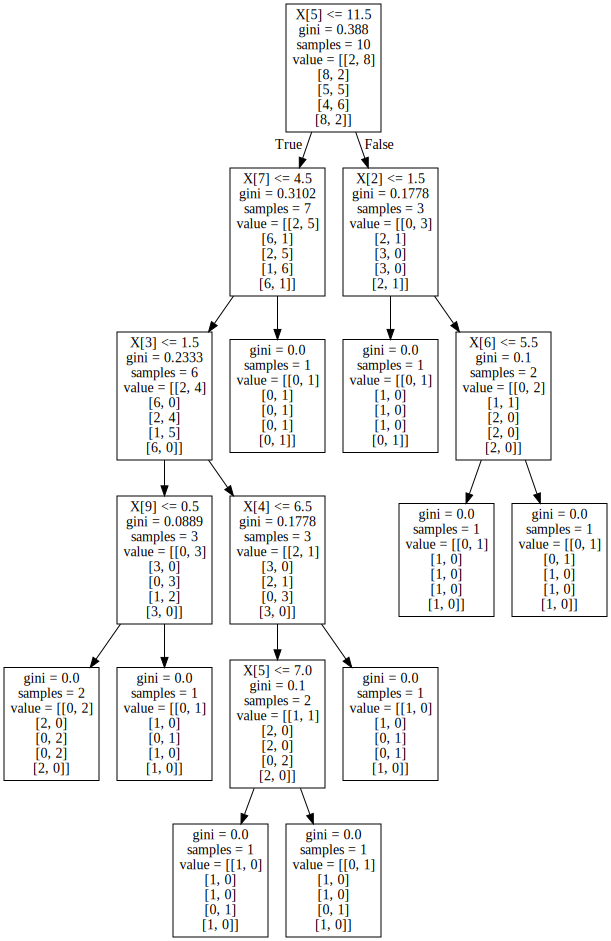

In [24]:
dot_data = tree.export_graphviz(arbol, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In [225]:
X1,Y1=conjunto_datos(n_instancias,n_caracteristicas,n_clases)
X1

array([[  5.,  12.,   1.,  13.,   6.,   6.,  12.,   5.],
       [  7.,  10.,   4.,   5.,   2.,   5.,  12.,   5.],
       [  4.,  10.,   0.,   9.,   7.,   2.,   7.,   5.],
       [ 15.,   5.,   6.,   7.,  17.,   2.,   7.,   1.],
       [  7.,   6.,   5.,  11.,   8.,   8.,   3.,  12.],
       [  7.,   6.,   6.,  11.,   6.,   3.,   4.,   2.],
       [  8.,   4.,   5.,   5.,   3.,   3.,   6.,   2.],
       [  6.,   4.,   2.,  13.,   1.,   5.,   9.,   6.],
       [  6.,   3.,   7.,   5.,   8.,   8.,   7.,   9.],
       [  3.,   6.,  12.,   7.,   0.,   7.,   7.,   5.]])

In [226]:
m_reducida2=reducir_datos(X1,rnd_dimensions)

In [227]:
m_vecinos2=vecino_cercano(n_instancias,rnd_neighbors,m_reducida2)
m_entrenamiento2=np.concatenate((X1,m_vecinos2),axis=1)

In [228]:
#e.predict(m_entrenamiento2)
print(e.predict(m_entrenamiento2))

[[ 0.  1.  0.  1.  1.]
 [ 0.  1.  0.  1.  1.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
